In [1]:
# Tensorflow.keras 이용
# 32.챗봇_04_딥러닝모델 참고
# 공부한 부분을 순서대로 참고하면서 이해하는 목적 
# 모르면 답지도 같이 올려드리니 참고하세용~! 
# 빈 부분만 코드 작성하시면 됩니당

# 오류와 한글처리
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# 한글처리
plt.rcParams['font.family'] = 'gulim'
plt.rcParams['axes.unicode_minus'] =False

# 챗봇 엔진에 필요한 딥러닝 모델 사용하기
# 케라스는 신경망모델 구축시 필요한 라이브러리이다(tensorflow 버전올라가면서 keras흡수)
# MNIST 분류모델 학습
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

In [2]:
# 데이터 만들기
# 1. 데이터 만들기
# 1) MNIST 데이터셋을 로드하여 이미지 픽셀 데이터인 X_train과 X_test, 해당 이미지의 레이블(0~9 숫자) 값을 y_train과 y_test에 unpacking
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 2) 이미지 픽셀 데이터(X_train과 X_test)를 0~255 범위에서 0~1 범위로 정규화
X_train, X_test = X_train/255, X_test/255

# 3) 정규화된 이미지 데이터 확인
print(X_train.shape, X_test.shape)

# 4) tf.data를 이용해서 X_train과 y_train 데이터를 결합하고, 10000개의 배치크기로 셔플
ds = tf.data.Dataset.from_tensor_slices((X_train, y_train)).shuffle(10000)

# 5) 전체 학습 데이터의 70%를 실제 학습에 사용할 데이터 크기로 설정 = > 학습용 vs 검증용 = 7:3
train_size = int(len(X_train) * 0.7)


# 6) 섞인 데이터셋에서 train_size만큼 데이터를 취하고, 배치 크기 20으로 설정 => 실제 학습에 사용될 데이터셋
train_ds = ds.take(train_size).batch(20)

# 7) 섞인 데이터셋에서 train_size만큼 건너뛰고, 나머지 데이터를 배치 크기 20으로 설정 => 검증에 사용될 데이터셋
val_ds = ds.skip(train_size).batch(20)

# 8) 실제 학습에 사용될 데이터의 크기를 출력
print(train_size)

(60000, 28, 28) (10000, 28, 28)
42000


In [3]:
# MNIST분류모델
# 딥러닝 프로세스

In [4]:
# 1. 모델정의
# 1-1) 케라스의 Sequential(순차적) 모델을 생성
model = Sequential()

# 1-2) 입력 데이터의 형태를 28x28 크기의 2차원 배열에서 784(28x28)개의 1차원 배열로 평평하게 만듭니다
model.add(Flatten(input_shape=(28,28)))

# 1-3) 20개의 노드를 가지며, 활성화 함수로 ReLU를 사용하는 은닉층 추가
model.add(Dense(20, activation='relu'))

# 1-4) 10개의 노드를 가지며, 활성화 함수로 tanh를 사용하는 은닉층 추가
model.add(Dense(10, activation='tanh'))

# 1-5) 10개의 노드(0~9 숫자 분류)를 가지며, 활성화 함수로 소프트맥스를 사용하는 출력층 추가
model.add(Dense(10, activation='softmax'))

In [5]:
# 2. 모델생성
# 2-1) 손실 함수로 sparse_categorical_crossentropy를, 최적화 알고리즘으로 SGD를, 그리고 정확도(accuracy) metric을 사용하는 모델 컴파일
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [6]:
# 3. 모델학습
# 3-1) train_ds를 학습 데이터로, val_ds를 검증 데이터로 사용하며, 15번의 epoch을 수행하여 모델 학습
hist = model.fit(train_ds, validation_data=val_ds, epochs=15)

Epoch 1/15
2100/2100 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.6094 - loss: 1.4041 - val_accuracy: 0.8675 - val_loss: 0.5637
Epoch 2/15
2100/2100 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8739 - loss: 0.5168 - val_accuracy: 0.9058 - val_loss: 0.3671
Epoch 3/15
2100/2100 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9063 - loss: 0.3606 - val_accuracy: 0.9178 - val_loss: 0.3001
Epoch 4/15
2100/2100 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9219 - loss: 0.2940 - val_accuracy: 0.9261 - val_loss: 0.2655
Epoch 5/15
2100/2100 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9294 - loss: 0.2554 - val_accuracy: 0.9331 - val_loss: 0.2407
Epoch 6/15
2100/2100 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9347 - loss: 0.2361 - val_accuracy: 0.9386 - val_loss: 0.2211
Epoch 7/15
2100/2100 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9388 - loss: 0.2168 - val_accuracy: 0.9383 - val_loss: 0.2166
Epoch 8/15
2100/2100 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9427 - loss: 0.2033 - 

In [7]:
# 4. 모델평가
# 4-1) 테스트 데이터셋(X_test, y_test)에 대해 모델을 평가
model.evaluate(X_test, y_test)

# 4-2) 모델의 레이어 구조와 파라미터 수를 출력
model.summary()

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9421 - loss: 0.1868


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 20)                  │          15,700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             210 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             110 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,022 (62.59 KB)

 Trainable params: 16,020 (62.58 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [8]:
# 5. 모델저장
# 5-1) 학습된 모델을 './data/chatbot/mnist_model.keras' 파일로 저장
model.save('./mnist_model.keras')

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 20)                  │          15,700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             210 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             110 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,022 (62.59 KB)

 Trainable params: 16,020 (62.58 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

313/313 - 1s - 2ms/step - accuracy: 0.9478 - loss: 0.1676


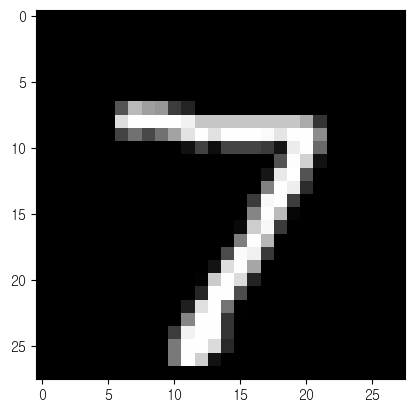

In [9]:
# 6. 학습된 모델을 사용해서 예측하기
from tensorflow.keras.models import load_model

# 6-1) 저장된 모델을 로드
model = load_model('./mnist_model.keras')

# 6-2) 로드된 모델 확인
model.summary()

# 6-3) 로드된 모델을 테스트 데이터셋에 대해 평가하고, 자세한 출력(evaluate사용)
model.evaluate(X_test, y_test, verbose=2)

# 6-4) 테스트 데이터셋의 첫 번째 이미지를 그레이스케일로 시각화
plt.imshow(X_test[0],cmap='gray')
plt.show()

In [10]:
import numpy as np
# 7. 모델을 사용하여 img 인덱스에 해당하는 테스트 이미지를 분류
# 7-1) np.argmax를 사용하여 가장 높은 확률을 가진 클래스 인덱스를 예측값으로 갖는다
img = 100
predict = np.argmax(model.predict(X_test[[img]]))

# 7-2) 예측한 숫자를 출력
print(f'손글씨 이미지의 예측한 숫자 = {predict}')

# 결과분석
# 예측을 잘 못하는 것을 볼 수 있음

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
손글씨 이미지의 예측한 숫자 = 6
